In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier 
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn import metrics

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Importing dataset

In [5]:
df = pd.read_excel('/content/drive/MyDrive/Projects/ecommerce.xlsx')

In [6]:
df.head()

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,50001,1,4.0,Mobile Phone,3,6.0,Debit Card,Female,3.0,3,Laptop & Accessory,2,Single,9,1,11.0,1.0,1.0,5.0,159.93
1,50002,1,NaN,Phone,1,8.0,UPI,Male,3.0,4,Mobile,3,Single,7,1,15.0,0.0,1.0,0.0,120.90
2,50003,1,NaN,Phone,1,30.0,Debit Card,Male,2.0,4,Mobile,3,Single,6,1,14.0,0.0,1.0,3.0,120.28
3,50004,1,0.0,Phone,3,15.0,Debit Card,Male,2.0,4,Laptop & Accessory,5,Single,8,0,23.0,0.0,1.0,3.0,134.07
4,50005,1,0.0,Phone,1,12.0,CC,Male,NaN,3,Mobile,5,Single,3,0,11.0,1.0,1.0,3.0,129.60


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5630 entries, 0 to 5629
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   CustomerID                   5630 non-null   int64  
 1   Churn                        5630 non-null   int64  
 2   Tenure                       5366 non-null   float64
 3   PreferredLoginDevice         5630 non-null   object 
 4   CityTier                     5630 non-null   int64  
 5   WarehouseToHome              5379 non-null   float64
 6   PreferredPaymentMode         5630 non-null   object 
 7   Gender                       5630 non-null   object 
 8   HourSpendOnApp               5375 non-null   float64
 9   NumberOfDeviceRegistered     5630 non-null   int64  
 10  PreferedOrderCat             5630 non-null   object 
 11  SatisfactionScore            5630 non-null   int64  
 12  MaritalStatus                5630 non-null   object 
 13  NumberOfAddress   

In [8]:
df.isnull().sum()

CustomerID                       0
Churn                            0
Tenure                         264
PreferredLoginDevice             0
CityTier                         0
WarehouseToHome                251
PreferredPaymentMode             0
Gender                           0
HourSpendOnApp                 255
NumberOfDeviceRegistered         0
PreferedOrderCat                 0
SatisfactionScore                0
MaritalStatus                    0
NumberOfAddress                  0
Complain                         0
OrderAmountHikeFromlastYear    265
CouponUsed                     256
OrderCount                     258
DaySinceLastOrder              307
CashbackAmount                   0
dtype: int64

In [9]:
df.duplicated().sum()

0

Numeric data:
+ Tenure
+ WarehouseToHome
+ HourSpendOnApp
+ NumberOfDeviceRegistered
+ NumberOfAddress
+ OrderAmountHikeFromlastYear
+ CouponUsed
+ OrderCount
+ DaySinceLastOrder
+ CashbackAmount

Categorical data: 
+ CustomerID
+ Churn
+ PreferredLoginDevice
+ CityTier
+ PreferredPaymentMode
+ Gender
+ PreferedOrderCat
+ SatisfactionScore
+ MaritalStatus
+ Complain 

# Descriptive statistics

### Convert to the right categorical data

In [10]:
df = df.drop('CustomerID', axis=1)

In [11]:
df['Complain'].value_counts()

0    4026
1    1604
Name: Complain, dtype: int64

In [12]:
df['Complain'] = np.where(df['Complain'] == 0, "No", "Yes")

In [13]:
df['CityTier'].value_counts()

1    3666
3    1722
2     242
Name: CityTier, dtype: int64

In [14]:
df['CityTier'] = df['CityTier'].replace({1: "C1", 2: "C2", 3: "C3"})

In [15]:
df['SatisfactionScore'].value_counts()

3    1698
1    1164
5    1108
4    1074
2     586
Name: SatisfactionScore, dtype: int64

In [16]:
df['SatisfactionScore'] = df['SatisfactionScore'].replace({1: "S1", 2: "S2", 3: "S3", 4: "S4", 5: "S5"})

In [17]:
for i in df.columns:
    if df[i].dtypes == 'object':
        print('The values of ' + i + ':')
        print(df[i].value_counts())
        print() 

The values of PreferredLoginDevice:
Mobile Phone    2765
Computer        1634
Phone           1231
Name: PreferredLoginDevice, dtype: int64

The values of CityTier:
C1    3666
C3    1722
C2     242
Name: CityTier, dtype: int64

The values of PreferredPaymentMode:
Debit Card          2314
Credit Card         1501
E wallet             614
UPI                  414
COD                  365
CC                   273
Cash on Delivery     149
Name: PreferredPaymentMode, dtype: int64

The values of Gender:
Male      3384
Female    2246
Name: Gender, dtype: int64

The values of PreferedOrderCat:
Laptop & Accessory    2050
Mobile Phone          1271
Fashion                826
Mobile                 809
Grocery                410
Others                 264
Name: PreferedOrderCat, dtype: int64

The values of SatisfactionScore:
S3    1698
S1    1164
S5    1108
S4    1074
S2     586
Name: SatisfactionScore, dtype: int64

The values of MaritalStatus:
Married     2986
Single      1796
Divorced     848


In [18]:
df.PreferredLoginDevice = df.PreferredLoginDevice.replace("Phone", "Mobile Phone")

In [19]:
df.PreferedOrderCat = df.PreferedOrderCat.replace("Mobile", "Mobile Phone")

## Numerical data

In [20]:
df.describe()

,Churn,Tenure,WarehouseToHome,HourSpendOnApp,NumberOfDeviceRegistered,NumberOfAddress,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
count,5630.000000,5366.000000,5379.000000,5375.000000,5630.000000,5630.000000,5365.000000,5374.000000,5372.000000,5323.000000,5630.000000
mean,0.168384,10.189899,15.639896,2.931535,3.688988,4.214032,15.707922,1.751023,3.008004,4.543491,177.223030
std,0.374240,8.557241,8.531475,0.721926,1.023999,2.583586,3.675485,1.894621,2.939680,3.654433,49.207036
min,0.000000,0.000000,5.000000,0.000000,1.000000,1.000000,11.000000,0.000000,1.000000,0.000000,0.000000
25%,0.000000,2.000000,9.000000,2.000000,3.000000,2.000000,13.000000,1.000000,1.000000,2.000000,145.770000
50%,0.000000,9.000000,14.000000,3.000000,4.000000,3.000000,15.000000,1.000000,2.000000,3.000000,163.280000
75%,0.000000,16.000000,20.000000,3.000000,4.000000,6.000000,18.000000,2.000000,3.000000,7.000000,196.392500
max,1.000000,61.000000,127.000000,5.000000,6.000000,22.000000,26.000000,16.000000,16.000000,46.000000,324.990000


In [21]:
cat = []
num = []
for i in df.columns:
  if i != 'Churn':
    if df[i].dtype == 'object':
      cat.append(i)
    else:
      num.append(i)
print('List of categorical data: ',cat)
print('List of numeric data: ',num)

List of categorical data:  ['PreferredLoginDevice', 'CityTier', 'PreferredPaymentMode', 'Gender', 'PreferedOrderCat', 'SatisfactionScore', 'MaritalStatus', 'Complain']
List of numeric data:  ['Tenure', 'WarehouseToHome', 'HourSpendOnApp', 'NumberOfDeviceRegistered', 'NumberOfAddress', 'OrderAmountHikeFromlastYear', 'CouponUsed', 'OrderCount', 'DaySinceLastOrder', 'CashbackAmount']


/usr/local/lib/python3.8/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


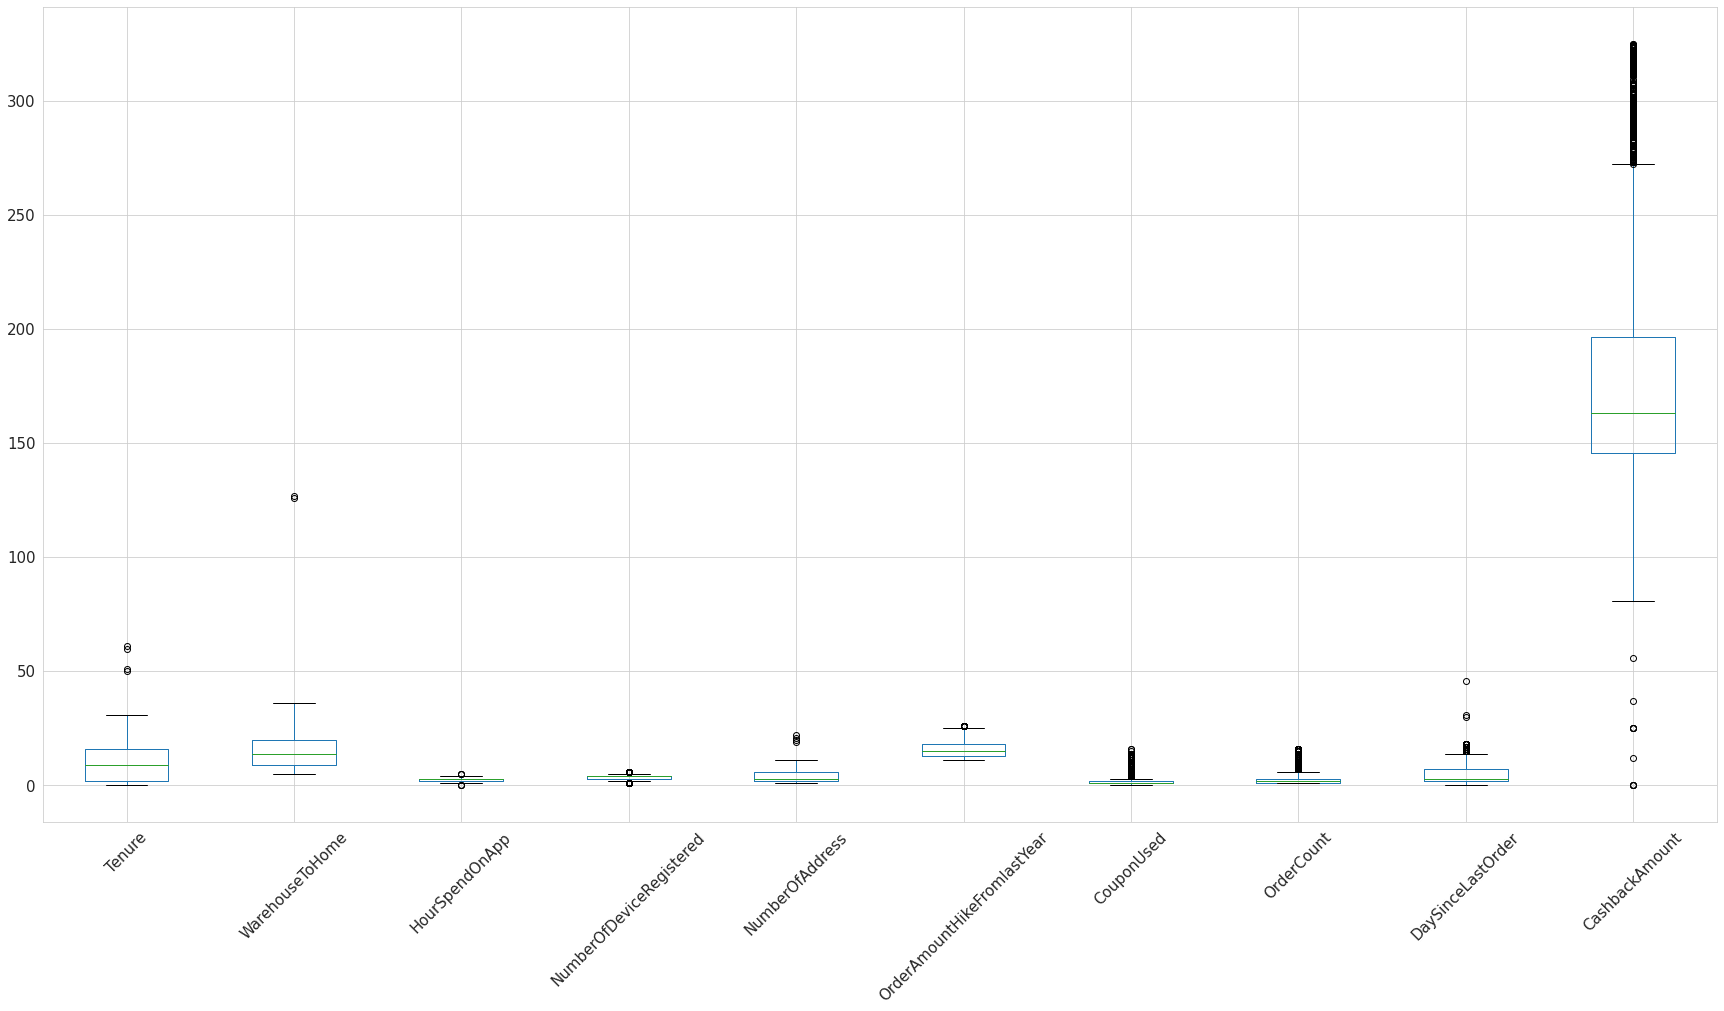

In [22]:
plt.figure(figsize=(30, 15))
sns.set_style("whitegrid")
df[num].boxplot(rot=45, fontsize=15);

## Categorical data

In [23]:
df[cat].describe().T

,count,unique,top,freq
PreferredLoginDevice,5630,2,Mobile Phone,3996
CityTier,5630,3,C1,3666
PreferredPaymentMode,5630,7,Debit Card,2314
Gender,5630,2,Male,3384
PreferedOrderCat,5630,5,Mobile Phone,2080
SatisfactionScore,5630,5,S3,1698
MaritalStatus,5630,3,Married,2986
Complain,5630,2,No,4026


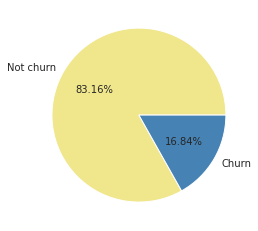

In [24]:
#Churn
df['Churn'] = df['Churn'].replace({0: "Not churn", 1:"Churn"})
plt.pie(df['Churn'].value_counts(), labels=df['Churn'].value_counts().index, autopct='%.2f%%', colors=['khaki', 'steelblue']);

In [25]:
df_cate = df[['PreferredLoginDevice', 'CityTier', 'PreferredPaymentMode',
              'PreferedOrderCat', 'Gender', 'SatisfactionScore',
              'MaritalStatus', 'Complain', 'Churn']]

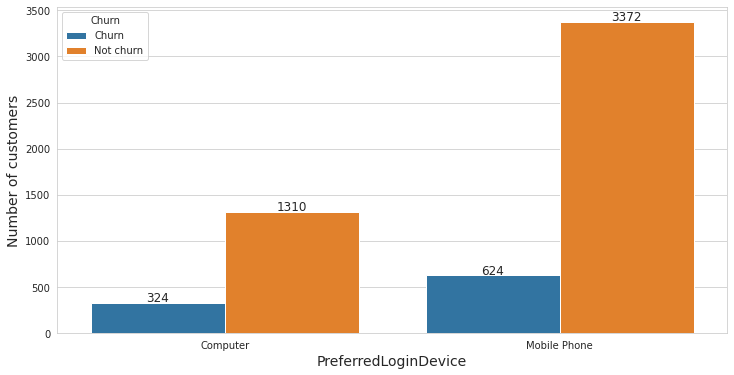

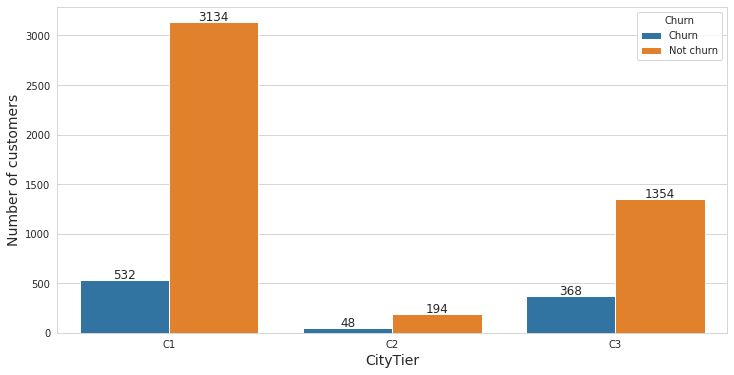

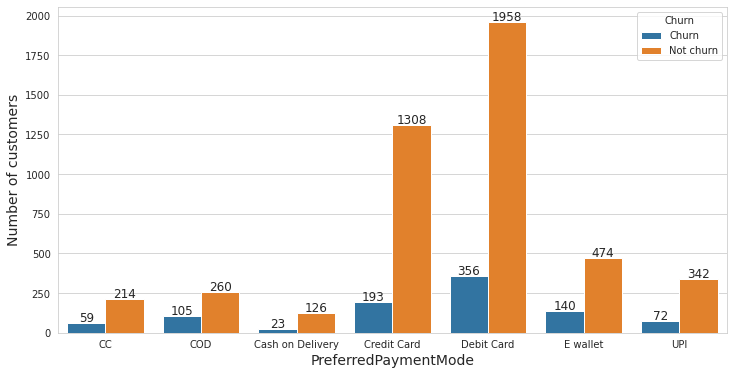

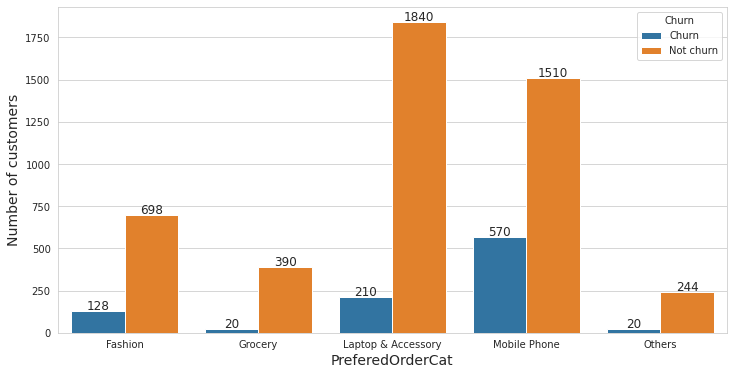

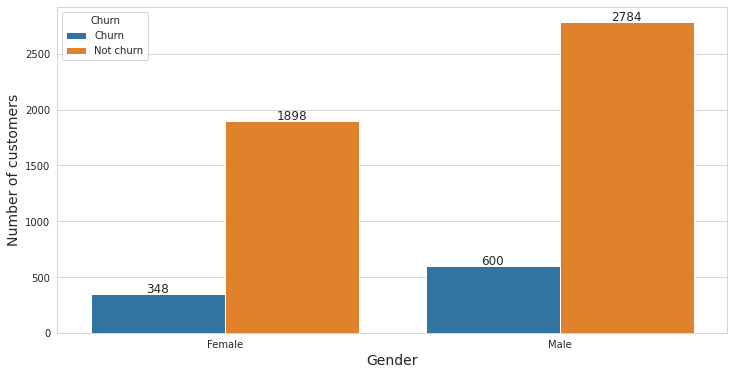

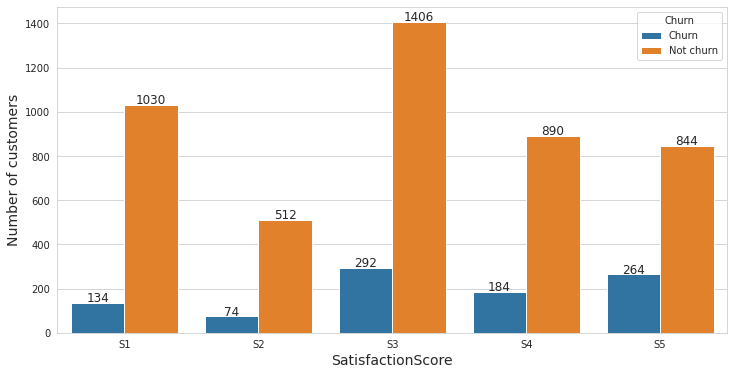

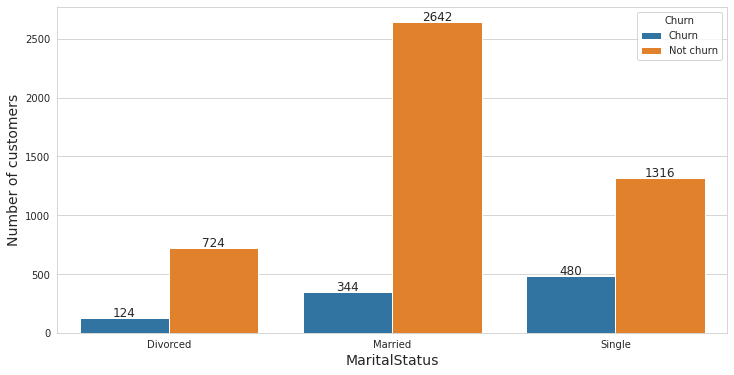

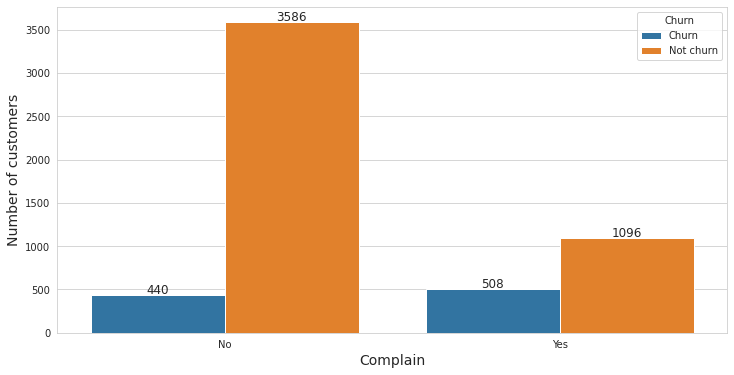

In [26]:
for i in df_cate.columns:
  if i != 'Churn':
    df_cate1 = pd.DataFrame({'count': df_cate.groupby([i, 'Churn']).Churn.count()}).reset_index()

    plt.figure(figsize=(12, 6))
    plots = sns.barplot(data = df_cate1, x = i, y = 'count', hue = 'Churn')
    for bar in plots.patches:
        plots.annotate(format(bar.get_height(), '.0f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=12, xytext=(0, 5),
                   textcoords='offset points')

    plt.xlabel(i, size=14)
    plt.ylabel("Number of customers", size=14)

In [27]:
df['Churn'] = df['Churn'].replace({"Churn": 1, "Not churn": 0})

# Outliers preprocessing

In [28]:
df1 = df
for i in df1.columns:
  if i in num:
    Q1 = df1[i].quantile(0.25)
    Q3 = df1[i].quantile(0.75)
    IQR = Q3-Q1
    
    df1 = df1[~((df1[i] < (Q1-1.5*IQR)) | (df1[i] > (Q3+1.5*IQR)))]
    # for j in range(0, 5630):
    #   if (df1[i].values[j] < (Q1-1.5*IQR)) or (df1[i].values[j] > (Q3+1.5*IQR)):
    #     df1[i].values[j] = df1[i].median()

In [29]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3634 entries, 0 to 5629
Data columns (total 19 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Churn                        3634 non-null   int64  
 1   Tenure                       3398 non-null   float64
 2   PreferredLoginDevice         3634 non-null   object 
 3   CityTier                     3634 non-null   object 
 4   WarehouseToHome              3430 non-null   float64
 5   PreferredPaymentMode         3634 non-null   object 
 6   Gender                       3634 non-null   object 
 7   HourSpendOnApp               3434 non-null   float64
 8   NumberOfDeviceRegistered     3634 non-null   int64  
 9   PreferedOrderCat             3634 non-null   object 
 10  SatisfactionScore            3634 non-null   object 
 11  MaritalStatus                3634 non-null   object 
 12  NumberOfAddress              3634 non-null   int64  
 13  Complain          

In [30]:
df = df1

#Feature Selection

### Weight of Evidence and Information Value

In [31]:
list_IV = []
list_feature = []

for ivars in df.columns:
        if (df[ivars].dtype.kind in 'bifc') and (len(np.unique(df[ivars]))>10):
            binned_x = pd.qcut(df[ivars], 20,  duplicates='drop')
            d0 = pd.DataFrame({'x': binned_x, 'y': df['Churn']})
        else:
            d0 = pd.DataFrame({'x': df[ivars], 'y': df['Churn']})

        d0 = d0.astype({"x": str})
        d = d0.groupby("x", as_index=False, dropna=False).agg({"y": ["count", "sum"]})
        d.columns = ['Cutoff', 'N', 'Events']
        d['% of Events'] = np.maximum(d['Events'], 0.5) / d['Events'].sum()
        d['Non-Events'] = d['N'] - d['Events']
        d['% of Non-Events'] = np.maximum(d['Non-Events'], 0.5) / d['Non-Events'].sum()
        d['WoE'] = np.log(d['% of Non-Events']/d['% of Events'])
        d['IV'] = d['WoE'] * (d['% of Non-Events']-d['% of Events'])

        list_feature.append(ivars)
        list_IV.append(d['IV'].sum())

In [32]:
df_IV = pd.DataFrame({'Feature': list_feature, 'Information Value': list_IV})
df_IV

,Feature,Information Value
0,Churn,15.906024
1,Tenure,1.832357
2,PreferredLoginDevice,0.015266
3,CityTier,0.027118
4,WarehouseToHome,0.141542
5,PreferredPaymentMode,0.087562
6,Gender,0.007356
7,HourSpendOnApp,0.022859
8,NumberOfDeviceRegistered,0.069650
9,PreferedOrderCat,0.356915


In [33]:
df_IV_draw = df_IV.drop([0])

In [34]:
df_IV_draw.Feature = df_IV_draw.Feature.replace({'OrderAmountHikeFromlastYear':'OrderAmount',
                                       'NumberOfDeviceRegistered': 'NumberofDevice',
                                       'PreferredPaymentMode': 'PaymentMode'})

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17]), <a list of 18 Text major ticklabel objects>)

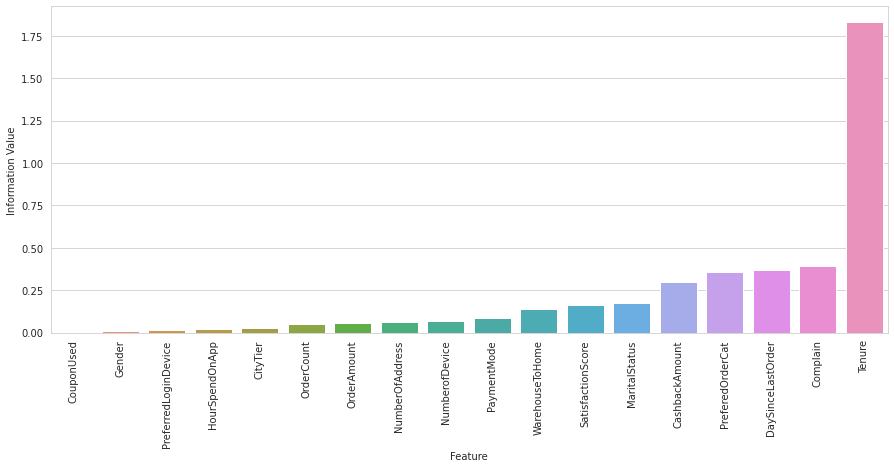

In [35]:
df_IV_draw = df_IV_draw.sort_values('Information Value')
plt.figure(figsize=(15,6))
sns.barplot(x = 'Feature',
            y = 'Information Value',
            data = df_IV_draw)
plt.xticks(rotation = 90)

### Missing values

In [36]:
for i in df.columns:
  if df[i].isnull().sum() != 0:
     print(i)
     print(df[i].median())

Tenure
7.0
WarehouseToHome
14.0
HourSpendOnApp
3.0
OrderCount
2.0
DaySinceLastOrder
3.0


In [37]:
for i in df.columns:
  if df[i].isnull().sum() != 0:
     df[i] = df[i].fillna(df[i].median())

In [38]:
# Check again
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3634 entries, 0 to 5629
Data columns (total 19 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Churn                        3634 non-null   int64  
 1   Tenure                       3634 non-null   float64
 2   PreferredLoginDevice         3634 non-null   object 
 3   CityTier                     3634 non-null   object 
 4   WarehouseToHome              3634 non-null   float64
 5   PreferredPaymentMode         3634 non-null   object 
 6   Gender                       3634 non-null   object 
 7   HourSpendOnApp               3634 non-null   float64
 8   NumberOfDeviceRegistered     3634 non-null   int64  
 9   PreferedOrderCat             3634 non-null   object 
 10  SatisfactionScore            3634 non-null   object 
 11  MaritalStatus                3634 non-null   object 
 12  NumberOfAddress              3634 non-null   int64  
 13  Complain          

# Logistic Regression

Selecting the features with the information gain higher than or equal to 0.02
The number of features selected is 15
              precision    recall  f1-score   support

           0     0.9415    0.8872    0.9135       780
           1     0.4943    0.6667    0.5677       129

    accuracy                         0.8559       909
   macro avg     0.7179    0.7769    0.7406       909
weighted avg     0.8780    0.8559    0.8644       909

The Accuracy is 0.8558855885588559


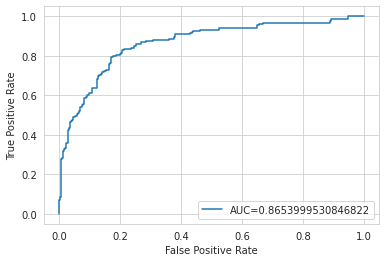

-------------------------------------------------------------------------------------------
Selecting the features with the information gain higher than or equal to 0.1
The number of features selected is 8
              precision    recall  f1-score   support

           0     0.9442    0.8852    0.9138       784
           1     0.4828    0.6720    0.5619       125

    accuracy                         0.8559       909
   macro avg     0.7135    0.7786    0.7378       909
weighted avg     0.8808    0.8559    0.8654       909

The Accuracy is 0.8558855885588559


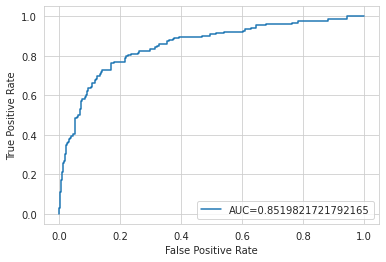

-------------------------------------------------------------------------------------------
Selecting the features with the information gain higher than or equal to 0.3
The number of features selected is 4
              precision    recall  f1-score   support

           0     0.9537    0.8752    0.9128       801
           1     0.4253    0.6852    0.5248       108

    accuracy                         0.8526       909
   macro avg     0.6895    0.7802    0.7188       909
weighted avg     0.8910    0.8526    0.8667       909

The Accuracy is 0.8525852585258525


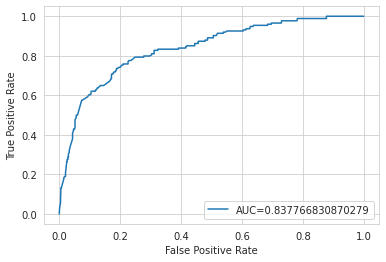

-------------------------------------------------------------------------------------------


In [39]:
for i in [0.02, 0.1, 0.3]:
  df_selected_feature = df_IV[df_IV['Information Value'] >= i]
  df_model = pd.DataFrame()
  
  for j in df_selected_feature.Feature:
    df_model[j] = df[j]

  ## Encoding categorical independent variables
  df_encoded = pd.get_dummies(df_model,drop_first=True)
  
  ## Train test split
  X = df_encoded.drop(['Churn'],axis=1)
  y = df_encoded['Churn']
  X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.75, random_state=42)
  

  ## Standardization 
  stdsc = StandardScaler()
  X_train_std = stdsc.fit_transform(X_train)
  X_test_std = stdsc.transform(X_test)


  ## Logistic Regression 
  lr = LogisticRegression()
  lr.fit(X_train_std, y_train)
  ytest_predict = lr.predict(X_test_std)  
  ytest_predict_proba = lr.predict_proba(X_test_std)

  print("Selecting the features with the information gain higher than or equal to {}".format(i))
  print("The number of features selected is {}".format(df_selected_feature.shape[0]-1))
  print(classification_report(ytest_predict, y_test, digits=4))
  print("The Accuracy is {}".format(lr.score(X_test_std, y_test)))

  # Biểu đồ đường ROC và biểu thị AUC 
  fpr, tpr,_ = metrics.roc_curve(y_test,  ytest_predict_proba[:, 1])
  auc = metrics.roc_auc_score(y_test, ytest_predict_proba[:, 1]) 

  #create ROC curve
  plt.plot(fpr, tpr, label="AUC="+str(auc))
  plt.ylabel('True Positive Rate')
  plt.xlabel('False Positive Rate')
  plt.legend(loc=4)
  plt.show()
  print("-------------------------------------------------------------------------------------------")


# Decision Tree

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3634 entries, 0 to 5629
Data columns (total 16 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Churn                        3634 non-null   int64  
 1   Tenure                       3634 non-null   float64
 2   CityTier                     3634 non-null   object 
 3   WarehouseToHome              3634 non-null   float64
 4   PreferredPaymentMode         3634 non-null   object 
 5   HourSpendOnApp               3634 non-null   float64
 6   NumberOfDeviceRegistered     3634 non-null   int64  
 7   PreferedOrderCat             3634 non-null   object 
 8   SatisfactionScore            3634 non-null   object 
 9   MaritalStatus                3634 non-null   object 
 10  NumberOfAddress              3634 non-null   int64  
 11  Complain                     3634 non-null   object 
 12  OrderAmountHikeFromlastYear  3634 non-null   float64
 13  OrderCount        

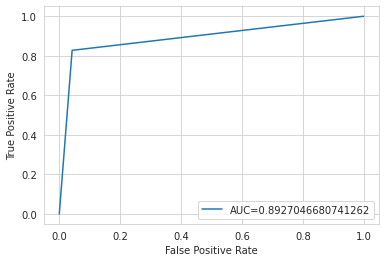

-------------------------------------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
Int64Index: 3634 entries, 0 to 5629
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Churn              3634 non-null   int64  
 1   Tenure             3634 non-null   float64
 2   WarehouseToHome    3634 non-null   float64
 3   PreferedOrderCat   3634 non-null   object 
 4   SatisfactionScore  3634 non-null   object 
 5   MaritalStatus      3634 non-null   object 
 6   Complain           3634 non-null   object 
 7   DaySinceLastOrder  3634 non-null   float64
 8   CashbackAmount     3634 non-null   float64
dtypes: float64(4), int64(1), object(4)
memory usage: 283.9+ KB
Selecting the features with the information gain higher than or equal to 0.1
The number of features selected is 8
              precision    recall  f1-score   support

           0     0.9524    0.9669    0.95

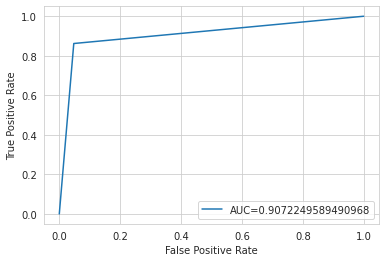

-------------------------------------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
Int64Index: 3634 entries, 0 to 5629
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Churn              3634 non-null   int64  
 1   Tenure             3634 non-null   float64
 2   PreferedOrderCat   3634 non-null   object 
 3   Complain           3634 non-null   object 
 4   DaySinceLastOrder  3634 non-null   float64
dtypes: float64(2), int64(1), object(2)
memory usage: 170.3+ KB
Selecting the features with the information gain higher than or equal to 0.3
The number of features selected is 4
              precision    recall  f1-score   support

           0     0.9265    0.8984    0.9123       758
           1     0.5575    0.6424    0.5969       151

    accuracy                         0.8559       909
   macro avg     0.7420    0.7704    0.7546       909
weighted avg    

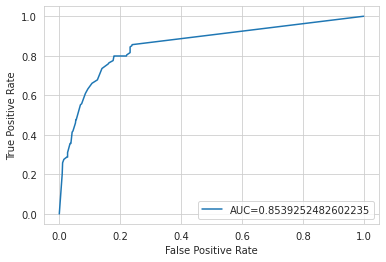

-------------------------------------------------------------------------------------------


In [40]:
for i in [0.02, 0.1, 0.3]:
  df_selected_feature = df_IV[df_IV['Information Value'] >= i]
  df_model = pd.DataFrame()
  
  for j in df_selected_feature.Feature:
    df_model[j] = df[j]
  df_model.info()
  ## Encoding categorical independent variables
  df_encoded = pd.get_dummies(df_model,drop_first=True)
  
  ## Train test split
  X = df_encoded.drop(['Churn'],axis=1)
  y = df_encoded['Churn']
  X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.75, random_state=42)

   # Standardization 
  stdsc = StandardScaler()
  X_train_std = stdsc.fit_transform(X_train)
  X_test_std = stdsc.transform(X_test)

  ## Decision Tree  
  tree = DecisionTreeClassifier(random_state=1, criterion='gini')
  tree = tree.fit(X_train_std, y_train)  
  ytest_predict1 = tree.predict(X_test_std)  
  ytest_predict_proba1 = tree.predict_proba(X_test_std)


  print("Selecting the features with the information gain higher than or equal to {}".format(i))
  print("The number of features selected is {}".format(df_selected_feature.shape[0]-1))
  print(classification_report(ytest_predict1, y_test, digits=4))
  print("The Accuracy is {}".format(tree.score(X_test_std, y_test)))

  # Biểu đồ đường ROC và biểu thị AUC 
  fpr, tpr,_ = metrics.roc_curve(y_test,  ytest_predict_proba1[:, 1])
  auc = metrics.roc_auc_score(y_test, ytest_predict_proba1[:, 1]) 

  #create ROC curve
  plt.plot(fpr, tpr, label="AUC="+str(auc))
  plt.ylabel('True Positive Rate')
  plt.xlabel('False Positive Rate')
  plt.legend(loc=4)
  plt.show()
  print("-------------------------------------------------------------------------------------------")


# Compare models for predicting class 1 - customers churning

In [41]:
dt_pe = [0.8621, 0.8108, 0.8357]
lr_pe = [0.4828, 0.6720, 0.5619]

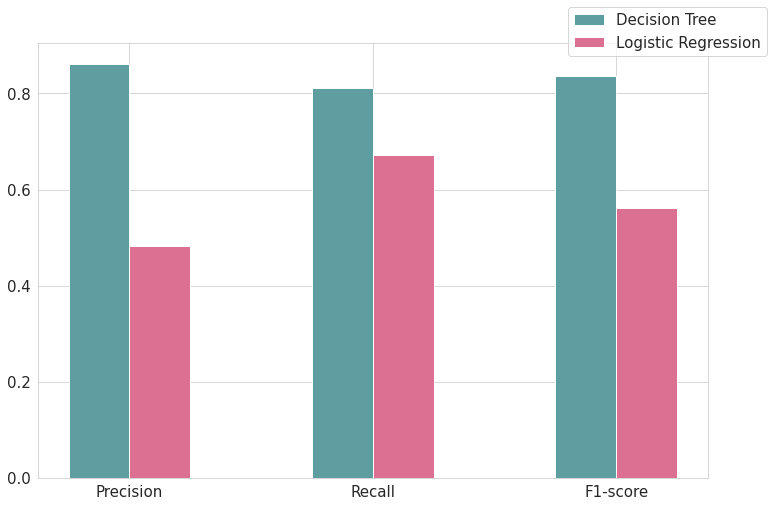

In [42]:
r = np.arange(3)
width = 0.25 

matplotlib.rcParams.update({'font.size': 15})

plt.figure(figsize=(12, 8));
plt.bar(r, dt_pe, width = width, label = 'Decision Tree', color='cadetblue');
plt.bar(r + width, lr_pe, width = width, label = 'Logistic Regression', color='palevioletred');

plt.xticks(r + width/2,['Precision','Recall','F1-score']);
plt.legend(loc='upper right', bbox_to_anchor=(1.1,1.1));

# Analysing the result

In [43]:
df_selected_feature = df_IV[df_IV['Information Value'] >= 0.1]
df_model = pd.DataFrame()
  
for j in df_selected_feature.Feature:
  df_model[j] = df[j]
  
## Encoding categorical independent variables
df_encoded = pd.get_dummies(df_model,drop_first=True)
  
## Train test split
X = df_encoded.drop(['Churn'],axis=1)
y = df_encoded['Churn']
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.75, random_state=42)

# Standardization 
stdsc = StandardScaler()
X_train_std = stdsc.fit_transform(X_train)
X_test_std = stdsc.transform(X_test)

## Decision Tree  
tree = DecisionTreeClassifier(random_state=1, criterion='gini')
tree = tree.fit(X_train_std, y_train)  
ytest_predict1 = tree.predict(X_test_std)  

y_result = pd.DataFrame({'predicting y': ytest_predict1})

In [44]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 909 entries, 1943 to 5063
Data columns (total 14 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Tenure                               909 non-null    float64
 1   WarehouseToHome                      909 non-null    float64
 2   DaySinceLastOrder                    909 non-null    float64
 3   CashbackAmount                       909 non-null    float64
 4   PreferedOrderCat_Grocery             909 non-null    uint8  
 5   PreferedOrderCat_Laptop & Accessory  909 non-null    uint8  
 6   PreferedOrderCat_Mobile Phone        909 non-null    uint8  
 7   SatisfactionScore_S2                 909 non-null    uint8  
 8   SatisfactionScore_S3                 909 non-null    uint8  
 9   SatisfactionScore_S4                 909 non-null    uint8  
 10  SatisfactionScore_S5                 909 non-null    uint8  
 11  MaritalStatus_Married       

In [45]:
df_cate = X_test[['PreferedOrderCat_Grocery', 'PreferedOrderCat_Laptop & Accessory',
                  'PreferedOrderCat_Mobile Phone']]

In [46]:
df_cate['PreferedOrderCat_Others'] = 1 - df_cate['PreferedOrderCat_Grocery'] - df_cate['PreferedOrderCat_Laptop & Accessory'] - df_cate['PreferedOrderCat_Mobile Phone']

<ipython-input-46-7cf677895a69>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cate['PreferedOrderCat_Others'] = 1 - df_cate['PreferedOrderCat_Grocery'] - df_cate['PreferedOrderCat_Laptop & Accessory'] - df_cate['PreferedOrderCat_Mobile Phone']


In [47]:
df_cate

,PreferedOrderCat_Grocery,PreferedOrderCat_Laptop & Accessory,PreferedOrderCat_Mobile Phone,PreferedOrderCat_Others
1943,0,0,1,0
170,1,0,0,0
1248,0,1,0,0
2332,0,0,0,1
4456,0,0,1,0
...,...,...,...,...
148,0,1,0,0
2827,0,0,1,0
3423,0,1,0,0
2178,0,0,1,0


In [48]:
res =  pd.DataFrame(df_cate[df_cate==1].stack()).reset_index()

In [49]:
res = res.set_index('level_0')

In [50]:
res.index.name = None

In [51]:
res = res.drop(0, axis=1)

In [52]:
res['level_1'] = res['level_1'].apply(lambda x: x[17:])

In [53]:
res = res.rename(columns = {'level_1':'PreferedOrderCat'})

In [54]:
df_sa = X_test[['SatisfactionScore_S2', 'SatisfactionScore_S3',
                  'SatisfactionScore_S4', 'SatisfactionScore_S5']]

In [55]:
df_sa['SatisfactionScore_S1'] = 1 - df_sa['SatisfactionScore_S2'] - df_sa['SatisfactionScore_S3'] - df_sa['SatisfactionScore_S4'] - df_sa['SatisfactionScore_S5']

<ipython-input-55-c780d0a5bfc9>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sa['SatisfactionScore_S1'] = 1 - df_sa['SatisfactionScore_S2'] - df_sa['SatisfactionScore_S3'] - df_sa['SatisfactionScore_S4'] - df_sa['SatisfactionScore_S5']


In [56]:
res_sa =  pd.DataFrame(df_sa[df_sa==1].stack()).reset_index()

In [57]:
res_sa = res_sa.set_index('level_0')
res_sa.index.name = None
res_sa = res_sa.drop(0, axis=1)
res_sa['level_1'] = res_sa['level_1'].apply(lambda x: x[18:])

In [58]:
res_sa = res_sa.rename(columns = {'level_1':'SatisfactionScore'})

In [59]:
df_ma = X_test[['MaritalStatus_Married', 'MaritalStatus_Single']]

In [60]:
df_ma['MaritalStatus_Divorced'] = 1 - df_ma['MaritalStatus_Married'] - df_ma['MaritalStatus_Single']

<ipython-input-60-94c9c87c4098>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ma['MaritalStatus_Divorced'] = 1 - df_ma['MaritalStatus_Married'] - df_ma['MaritalStatus_Single']


In [61]:
res_ma =  pd.DataFrame(df_ma[df_ma==1].stack()).reset_index()

In [62]:
res_ma = res_ma.set_index('level_0')
res_ma.index.name = None
res_ma = res_ma.drop(0, axis=1)
res_ma['level_1'] = res_ma['level_1'].apply(lambda x: x[14:])

In [63]:
res_ma = res_ma.rename(columns = {'level_1':'MaritalStatus'})

In [64]:
df_co = X_test[['Complain_Yes']]

In [65]:
df_co['Complain_No'] = 1 - df_co['Complain_Yes']

<ipython-input-65-b6990e25c4d1>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_co['Complain_No'] = 1 - df_co['Complain_Yes']


In [66]:
res_co =  pd.DataFrame(df_co[df_co==1].stack()).reset_index()

In [67]:
res_co = res_co.set_index('level_0')
res_co.index.name = None
res_co = res_co.drop(0, axis=1)
res_co['level_1'] = res_co['level_1'].apply(lambda x: x[9:])

In [68]:
res_co = res_co.rename(columns = {'level_1':'Complain'})

In [69]:
test_set = X_test[['Tenure', 'WarehouseToHome', 'DaySinceLastOrder', 'CashbackAmount']]

In [70]:
test_set

,Tenure,WarehouseToHome,DaySinceLastOrder,CashbackAmount
1943,0.0,8.0,1.0,143.82
170,15.0,32.0,8.0,235.25
1248,7.0,14.0,7.0,121.33
2332,24.0,8.0,2.0,205.96
4456,1.0,10.0,1.0,139.20
...,...,...,...,...
148,10.0,12.0,1.0,165.02
2827,1.0,12.0,3.0,159.41
3423,1.0,9.0,4.0,179.72
2178,0.0,14.0,2.0,125.39


In [71]:
test_set = pd.concat([test_set, res, res_sa, res_ma, res_co], axis=1)

In [72]:
test_set = test_set.reset_index()

In [73]:
test_set = test_set.drop('index', axis=1)

In [74]:
test_set

,Tenure,WarehouseToHome,DaySinceLastOrder,CashbackAmount,PreferedOrderCat,SatisfactionScore,MaritalStatus,Complain
0,0.0,8.0,1.0,143.82,Mobile Phone,S3,Single,No
1,15.0,32.0,8.0,235.25,Grocery,S4,Divorced,No
2,7.0,14.0,7.0,121.33,Laptop & Accessory,S4,Married,Yes
3,24.0,8.0,2.0,205.96,Others,S4,Married,No
4,1.0,10.0,1.0,139.20,Mobile Phone,S3,Single,No
...,...,...,...,...,...,...,...,...
904,10.0,12.0,1.0,165.02,Laptop & Accessory,S2,Divorced,No
905,1.0,12.0,3.0,159.41,Mobile Phone,S3,Single,Yes
906,1.0,9.0,4.0,179.72,Laptop & Accessory,S2,Divorced,No
907,0.0,14.0,2.0,125.39,Mobile Phone,S3,Married,No


In [75]:
test_set = pd.concat([test_set, y_result], axis=1)

In [76]:
test_set

,Tenure,WarehouseToHome,DaySinceLastOrder,CashbackAmount,PreferedOrderCat,SatisfactionScore,MaritalStatus,Complain,predicting y
0,0.0,8.0,1.0,143.82,Mobile Phone,S3,Single,No,1
1,15.0,32.0,8.0,235.25,Grocery,S4,Divorced,No,0
2,7.0,14.0,7.0,121.33,Laptop & Accessory,S4,Married,Yes,0
3,24.0,8.0,2.0,205.96,Others,S4,Married,No,0
4,1.0,10.0,1.0,139.20,Mobile Phone,S3,Single,No,1
...,...,...,...,...,...,...,...,...,...
904,10.0,12.0,1.0,165.02,Laptop & Accessory,S2,Divorced,No,0
905,1.0,12.0,3.0,159.41,Mobile Phone,S3,Single,Yes,1
906,1.0,9.0,4.0,179.72,Laptop & Accessory,S2,Divorced,No,0
907,0.0,14.0,2.0,125.39,Mobile Phone,S3,Married,No,1


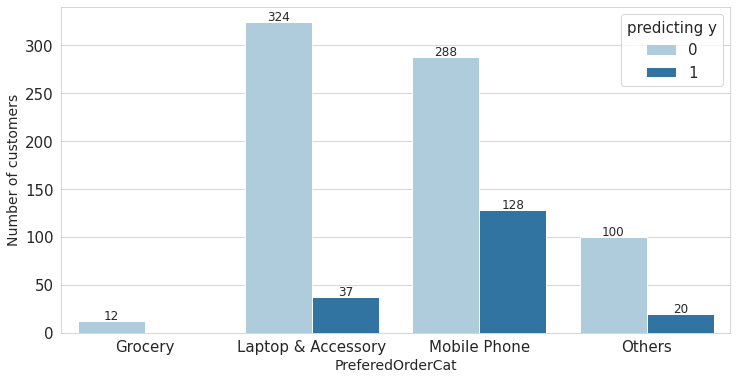

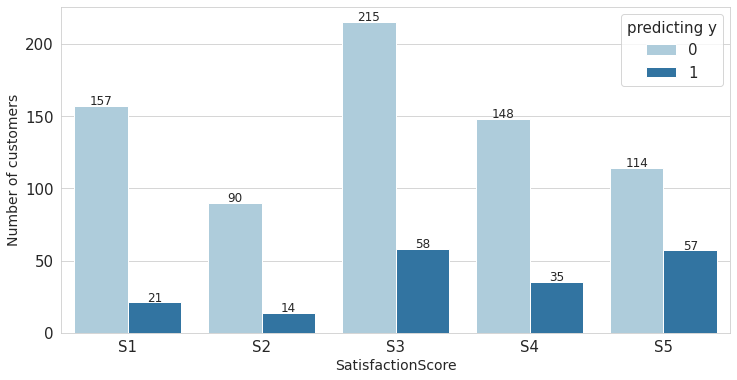

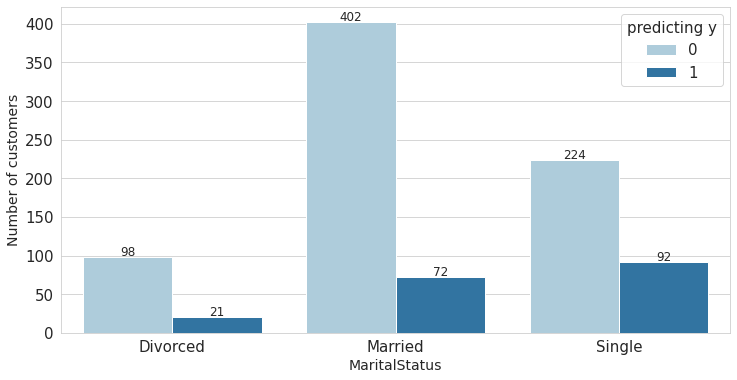

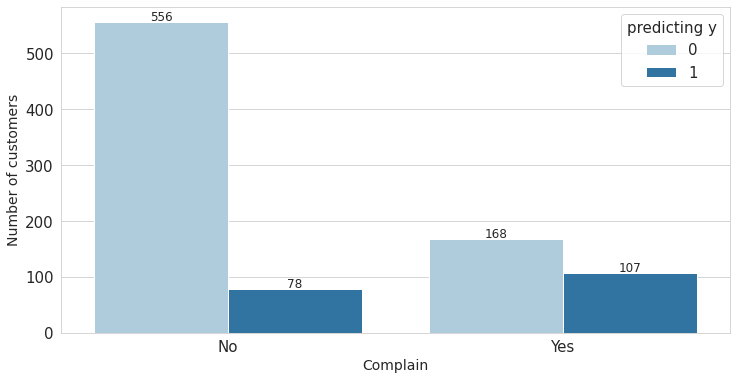

In [77]:
for i in test_set.columns:
  if test_set[i].dtype == object:
    if i != 'predicting y':
      df_test = pd.DataFrame({'count': test_set.groupby([i, 'predicting y'])['predicting y'].count()}).reset_index()
      
      palette = sns.color_palette("Paired")
      plt.figure(figsize=(12, 6))
      plots = sns.barplot(data = df_test, x = i, y = 'count', hue = 'predicting y', palette = palette)
      for bar in plots.patches:
          plots.annotate(format(bar.get_height(), '.0f'),
                    (bar.get_x() + bar.get_width() / 2,
                      bar.get_height()), ha='center', va='center',
                    size=12, xytext=(0, 5),
                    textcoords='offset points')
      
      plt.xlabel(i, size=14)
      plt.ylabel("Number of customers", size=14)

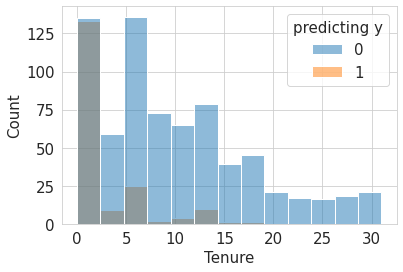

In [78]:
sns.histplot(data=test_set, x="Tenure", hue="predicting y");

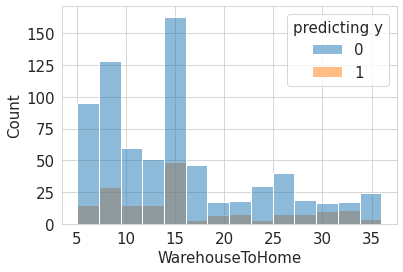

In [79]:
sns.histplot(data=test_set, x="WarehouseToHome", hue="predicting y");

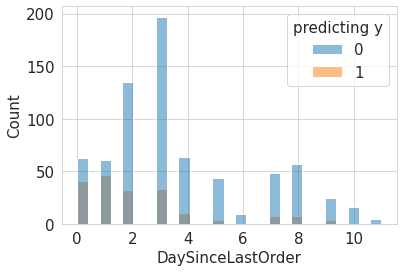

In [80]:
sns.histplot(data=test_set, x="DaySinceLastOrder", hue="predicting y");